<h1>Taller 4</h1><br><h2> Subsecuencia común más larga.</h2>

In [1]:
import math
import numpy as np
import pylab as pl
import random as rnd
import time
%matplotlib inline

<h3>1. 
Método para retornar la subsecuencia común más larga (SCL) apartir de la matriz C construida por el algoritmo de PD que calcula la longitud de la SCL.</h3>

In [2]:
def scl(s1, s2):

    result = [] 
    
    for i in range((len(s1)+1)):
        result.append((len(s2)+1)*[0])
    
    for i in range((len(s1))+1):
        for j in range((len(s2))+1):
            if i == 0 or j == 0 :
                result[i][j] = 0
            elif s1[i-1] == s2[j-1]:
                result[i][j] = result[i-1][j-1]+1
            else:
                result[i][j] = max(result[i-1][j] , result[i][j-1])
                
    return result[len(s1)][len(s2)]

In [3]:
print scl("analisis","algoritmo")

3


<h3>2. Para el problema del corte de la barilla:</h3>

<h4>2.1 Implemente un método para determinar los cortes que se deben realizar a partir de la solución de PD que encuentra el valor de la solución óptima.</h4>

In [4]:
def cut_rod(p,n):
    r=[]
    s=[]
    for i in range (n+1):
        r.append(0)
        s.append(-50)
        
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):
            if (q < p[(i-1)]+r[(j-i)]):
                cortes = []
                cortes.append(i)
                if(s[(j-i)] != -50):
                    for a in range (len(s[(j-i)])):
                        cortes.append(s[(j-i)][a])
                q = p[(i-1)]+r[(j-i)]
        r[j] = q
        s[j] = cortes 
        
    result=[]
    result.append(r[n])
    result.append(s[n])
    return result
# Basado en solución propuesta en Cormen cap. 15.1

In [5]:
p = [1,5,8,9,10,17,17,20,24,30,31,35,38,39,40,47]
x= cut_rod(p,15)

print "Valor optimo:",x[0]
print "Cortes:",x[1]

Valor optimo: 43
Cortes: [2, 3, 10]


<h4>2.2 Realice una comparación experimental sistemática de los algoritmos para diferentes valores  de p y de n.</h4>

In [6]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_cut_rod(p,n,acct):
    r=[]; acct.count()
    s=[]; acct.count()
    for i in range (n+1):
        acct.count()
        r.append(0); acct.count()
        s.append(-50); acct.count()
        
    for j in range(1,n+1):
        acct.count()
        q = float('-inf'); acct.count()
        for i in range(1,j+1):
            acct.count()
            if (q < p[(i-1)]+r[(j-i)]):
                acct.count()
                cortes = []; acct.count()
                cortes.append(i); acct.count()
                if(s[(j-i)] != -50):
                    acct.count()
                    for a in range (len(s[(j-i)])):
                        acct.count()
                        cortes.append(s[(j-i)][a]); acct.count()
                q = p[(i-1)]+r[(j-i)]; acct.count()
        r[j] = q; acct.count()
        s[j] = cortes ; acct.count()
        
    result=[]
    result.append(r[n])
    result.append(s[n])
    return result

def rod_exper_analysis(n):
    results = []
    tiempo=[]    
    acct = Counter()
    for i in range (1,n):
        tam= rnd.randint(1,i)
        costs=[0]*tam*2
        for x in range (len(costs)):
            costs[x]=rnd.randint(1,len(costs)*2)
        #print "Tamaño:",tam
        #print "Cortes:",costs
        acct.reset
        tic = time.clock()#get start time
        acct_cut_rod(costs,tam,acct)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
        results.append(acct.steps)
        
    r= [tiempo, results]
    
    return r

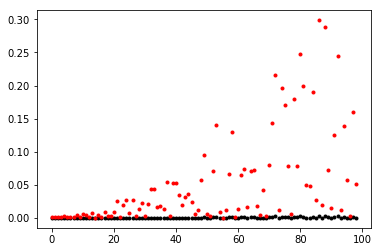

In [7]:
pl.figure (1)
x=np.arange(99)
res=(rod_exper_analysis(100))
p=np.array(res[0])
t=np.array(res[0])*100
pl.plot(x, p, 'k.', t, 'r.')

<h3>3. Implemente, describa y analice un algoritmo de PD para calcular la distancia de edición entre dos cadenas. </h3>

In [8]:
def edit_distance(a, b):
    
    resp=[]    
    tamA= len(a)
    tamB= len(b)
    
    for i in range(tamA+1):
        resp.append((tamB+1)*[0])
        resp[i][0]=i
        
    for i in range(tamB+1):
         resp[0][i] = i   
            
    for i in range(1, tamA+1):
        for j in range(1, tamB+1):            
            x=1
            if (a[i-1] == b[j-1]):
                x=0
                
            resp[i][j] = min(resp[i][j-1]+1, resp[i-1][j]+1, resp[i-1][j-1]+x)

    return resp[tamA][tamB]

In [9]:
x=edit_distance ("hola", "adios")
print x

5


En el algoritmo que se va a utilizar se requiere la creación de una matriz, de tamaño en filas del tamaño de la primera cadena + 1, y en columnas, del tamaño de la segunda cadena +1. Esta matriz debe inicializarse  en su primera fila, los números del 0 al tamaño de la cadena 1 +1; y en su primera columna, los números del 0 al tamaño de la cadena 2+1. 
Posteriormente, sen un ciclo anidado que recorra la matriz por filas y columnas(empezando en 1,1), se le debe asignar el valor a la respectiva celda, del mínimo resultado entre <pre>resp[i][j-1]+3, resp[i-1][j]+2, resp[i-1][j-1]+x</pre> siendo el primer caso inserción, el segundo eliminación, y el tercero, derecha cuando el valor de ambas cadenas en la respectiva posición sea igual($x=0$), o reemplazar de lo contrario ($x=4$).

El gasto en memoria de este algoritmo sería de: $(tamanoCadena1 +1)* (tamanoCadena2 +1)$ ya que solo se debe crear una matriz de tal tamaño.

El tiempo de ejecución teóricamente sería de $O(n*m)$ debido a que se utiliza un ciclo anidado recorrido $n*m$ veces.

A continuación se muestra el análisis experimental del tiempo de ejecución:

In [10]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_edit_distance(a, b, acct):
    
    resp=[]; acct.count()    
    tamA= len(a); acct.count()
    tamB= len(b); acct.count()
    
    for i in range(tamA+1):
        acct.count()
        resp.append((tamB+1)*[0]); acct.count()
        resp[i][0]=i; acct.count()
        
    for i in range(tamB+1):
        acct.count()
        resp[0][i] = i  ; acct.count() 
            
    for i in range(1, tamA+1):
        acct.count()
        for j in range(1, tamB+1): 
            acct.count()
            x=4 ; acct.count() 
            if (a[i-1] == b[j-1]):
                acct.count() 
                x=0; acct.count()
                
                
            resp[i][j] = min(resp[i][j-1]+3, resp[i-1][j]+2, resp[i-1][j-1]+x); acct.count() 

    return resp[tamA][tamB]

import string
import time

def exper_analysis(n):
    results = []
    tiempo=[]    
    acct = Counter()
    for i in range (1,n):
        x="".join(rnd.choice(string.ascii_uppercase)for _ in range (i))
        y="".join(rnd.choice(string.ascii_uppercase)for _ in range (i))
        acct.reset
        tic = time.clock()#get start time
        acct_edit_distance(x,y,acct)
        toc = time.clock()#get final time
        tiempo.append(toc-tic)
        results.append(acct.steps)
        
    r= [tiempo, results]
    
    return r

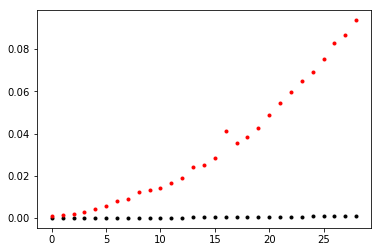

In [11]:
pl.figure (1)
x=np.arange(29)
res=(exper_analysis(30))
p=np.array(res[0])
t=np.array(res[0])*100
pl.plot(x, p, 'k.', t, 'r.')

<h3>4. En el rio atrato hay n embarcaderos, en cada uno de ellos se puede alquilar un bote para realizar un viaje rio abajo a otro embarcadero. Existe una tabla de tarifas que indica el costo del viaje del embarcadero i al j, para $i, j = 1,2,...,n  (i<j)$, puede pasar que un viaje de i a j sea más caro que una serie de viajes sucesivos intermedios, no hay un costo asociado a cambiar de bote en algún embarcadero. El problema consiste en diseñar un algoritmo de PD que determine el costo mínimo para cada par de puntos i,j.</h3>

In [12]:
def minCost(cost):
    
    for m in range (len(cost)):
        for n in range (len(cost[0])):
 
            result = [[0 for x in range(len(cost))] for x in range(len(cost[0]))]
            result[0][0] = cost[0][0]

            for i in range(1, m+1):
                result[i][0] = result[i-1][0] + cost[i][0]

            for j in range(1, n+1):
                result[0][j] = result[0][j-1] + cost[0][j]

            for i in range(1, m+1):
                for j in range(1, n+1):
                    result[i][j] = min(result[i-1][j-1], result[i-1][j], result[i][j-1]) + cost[i][j]
 
    return result


In [13]:
cost = [[3, 2, 5],
        [8, 8, 2],
        [1, 5, 1]]
print(minCost(cost))

[[3, 5, 10], [11, 11, 7], [12, 16, 8]]
